In [20]:
import pandas as pd

In [23]:
Dataset = pd.read_csv("Insurance Dataset.csv")
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.0 KB


In [24]:
# normalization for int values

def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [25]:
data_norm = norm(Dataset)

In [26]:
data_norm.describe()

,Premiums Paid,Age,Days to Renew,Claims made,Income
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.359493,0.391695,0.373125,0.108505,0.500000
std,0.250581,0.235384,0.275174,0.140185,0.293045
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.154059,0.186441,0.171875,0.033188,0.250000
50%,0.333026,0.372881,0.275000,0.065587,0.500000
75%,0.467712,0.533898,0.579688,0.129916,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [31]:
# find the value of TWSS
TWSS = []
k = list(range(2,9))
for i in k:
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(data_norm)
    TWSS.append(Kmeans.inertia_)
TWSS
    

[18.56906591852995,
 14.489584453634881,
 10.789031961178155,
 8.986223209946145,
 7.342376526891031,
 6.556981381869312,
 5.92184391903055]

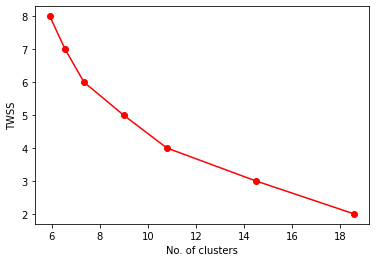

In [33]:
#scree plot
plt.plot(TWSS,k,'ro-');plt.xlabel("No. of clusters");plt.ylabel("TWSS")
plt.show()

# 3 clusters

In [34]:
# mmodel

model = KMeans(n_clusters = 3)
model.fit(data_norm)
model.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [35]:
Clust = pd.Series(model.labels_)

In [36]:
Dataset['Clust']=Clust

In [37]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Premiums Paid  100 non-null    int64  
 1   Age            100 non-null    int64  
 2   Days to Renew  100 non-null    int64  
 3   Claims made    100 non-null    float64
 4   Income         100 non-null    int64  
 5   Clust          100 non-null    int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 4.4 KB


In [38]:
Dataset_new = Dataset.iloc[:,[5,0,1,2,3,4]]
Dataset_new

,Clust,Premiums Paid,Age,Days to Renew,Claims made,Income
0,0,2800,26,233,3890.076336,28000
1,1,2950,27,130,2294.444444,29500
2,1,3100,28,144,2564.545455,31000
3,1,3250,30,65,1978.260870,32500
4,1,3400,32,56,2009.090909,34000
...,...,...,...,...,...,...
95,2,25575,63,76,16161.979170,170500
96,2,25800,62,166,23715.151520,172000
97,2,26025,59,167,24043.401020,173500
98,2,26250,58,245,40147.058820,175000


In [39]:
Dataset_new.to_csv("Insurance_data_ans.csv")

In [40]:
out = Dataset_new.groupby(Dataset_new.Clust).mean()
out

,Premiums Paid,Age,Days to Renew,Claims made,Income
Clust,,,,,
0,9254.761905,46.142857,237.761905,16713.571760,80928.571429
1,8845.918367,39.775510,64.551020,5464.794584,81173.469388
2,20880.833333,56.433333,129.466667,21304.646503,151600.000000
